## Triage EDA

In [1]:
import pandas as pd
import os
import sys
import numpy as np
from sklearn.impute import SimpleImputer

path = '../mimic-iv-ed/mimic-iv-ed-2.0/2.0/ed/'
ext = '.csv.gz'
triage  = 'triage'

df_triage = pd.read_csv(os.path.join(path+triage+ext))
TriageDataframe = pd.DataFrame(df_triage)
df_triage.head(len(df_triage))


subject_id   stay_id  temperature  heartrate  resprate  o2sat    sbp  \
0         10000032  32952584         97.8       87.0      14.0   97.0   71.0   
1         10000032  33258284         98.4       70.0      16.0   97.0  106.0   
2         10000032  35968195         99.4      105.0      18.0   96.0  106.0   
3         10000032  38112554         98.9       88.0      18.0   97.0  116.0   
4         10000032  39399961         98.7       77.0      16.0   98.0   96.0   
...            ...       ...          ...        ...       ...    ...    ...   
447707    19999784  37972930         98.0       91.0      16.0   99.0  148.0   
447708    19999828  30712109         98.1       83.0      18.0  100.0  107.0   
447709    19999828  32917002         96.6      112.0      18.0  100.0  110.0   
447710    19999914  32002659         99.5       81.0      10.0  100.0   93.0   
447711    19999987  34731548          NaN        NaN       NaN    NaN    NaN   

         dbp pain  acuity                            chiefcomplaint  
0       43.0    7     2.0                               Hypotension  
1       63.0    0     3.0            Abd pain, Abdominal distention  
2       57.0   10     3.0                           n/v/d, Abd pain  
3       88.0   10     3.0                      Abdominal distention  
4       50.0   13     2.0  Abdominal distention, Abd pain, LETHAGIC  
...      ...  ...     ...                                       ...  
447707  90.0    5     2.0                              Abnormal MRI  
447708  75.0    8     2.0                      Abd pain, Wound eval  
447709  82.0    4     2.0                      Abd pain, Wound eval  
447710  55.0    0     2.0      Altered mental status, Substance use  
447711   NaN  NaN     NaN                                HEAD BLEED  

[447712 rows x 11 columns]

In [4]:
df_triage.isna().sum()

subject_id            0
stay_id               0
temperature       24595
heartrate         17958
resprate          21375
o2sat             21649
sbp               19225
dbp               20068
pain              13617
acuity             7328
chiefcomplaint       23
dtype: int64

In [5]:
df_triage.dropna()

subject_id   stay_id  temperature  heartrate  resprate  o2sat    sbp  \
0         10000032  32952584         97.8       87.0      14.0   97.0   71.0   
1         10000032  33258284         98.4       70.0      16.0   97.0  106.0   
2         10000032  35968195         99.4      105.0      18.0   96.0  106.0   
3         10000032  38112554         98.9       88.0      18.0   97.0  116.0   
4         10000032  39399961         98.7       77.0      16.0   98.0   96.0   
...            ...       ...          ...        ...       ...    ...    ...   
447706    19999784  35692999         98.6       80.0      18.0  100.0  161.0   
447707    19999784  37972930         98.0       91.0      16.0   99.0  148.0   
447708    19999828  30712109         98.1       83.0      18.0  100.0  107.0   
447709    19999828  32917002         96.6      112.0      18.0  100.0  110.0   
447710    19999914  32002659         99.5       81.0      10.0  100.0   93.0   

          dbp pain  acuity                            chiefcomplaint  
0        43.0    7     2.0                               Hypotension  
1        63.0    0     3.0            Abd pain, Abdominal distention  
2        57.0   10     3.0                           n/v/d, Abd pain  
3        88.0   10     3.0                      Abdominal distention  
4        50.0   13     2.0  Abdominal distention, Abd pain, LETHAGIC  
...       ...  ...     ...                                       ...  
447706  100.0    0     3.0                            L Leg weakness  
447707   90.0    5     2.0                              Abnormal MRI  
447708   75.0    8     2.0                      Abd pain, Wound eval  
447709   82.0    4     2.0                      Abd pain, Wound eval  
447710   55.0    0     2.0      Altered mental status, Substance use  

[410043 rows x 11 columns]

In [14]:
df_triage.head(10)

subject_id   stay_id  temperature  heartrate  resprate  o2sat    sbp   dbp  \
0    10000032  32952584        97.80       87.0      14.0   97.0   71.0  43.0   
1    10000032  33258284        98.40       70.0      16.0   97.0  106.0  63.0   
2    10000032  35968195        99.40      105.0      18.0   96.0  106.0  57.0   
3    10000032  38112554        98.90       88.0      18.0   97.0  116.0  88.0   
4    10000032  39399961        98.70       77.0      16.0   98.0   96.0  50.0   
5    10000084  35203156        97.50       78.0      16.0  100.0  114.0  71.0   
6    10000084  36954971        98.70       80.0      16.0   95.0  111.0  72.0   
7    10000108  32522732        98.21       83.0      20.0  100.0  112.0  81.0   
8    10000108  36533795        98.80       98.0      16.0  100.0  135.0  85.0   
9    10000108  39513268        98.80      101.0      18.0  100.0  131.0  62.0   

  pain  acuity                            chiefcomplaint  
0    7     2.0                               Hypotension  
1    0     3.0            Abd pain, Abdominal distention  
2   10     3.0                           n/v/d, Abd pain  
3   10     3.0                      Abdominal distention  
4   13     2.0  Abdominal distention, Abd pain, LETHAGIC  
5    0     2.0                 Confusion, Hallucinations  
6    0     2.0      Altered mental status, B Pedal edema  
7    5     3.0                           L CHEEK ABSCESS  
8    5     3.0              LEFT CHEEK SWELLING, Abscess  
9    5     3.0                         L FACIAL SWELLING

## Medrecon EDA 

In [6]:
#EDA for Medrecon
medrecon = 'medrecon'
df_medrecon = pd.read_csv(os.path.join(path+medrecon+ext))
MedreconDataframe = pd.DataFrame(df_medrecon)
df_medrecon

subject_id   stay_id            charttime  \
0          10000032  32952584  2180-07-22 17:26:00   
1          10000032  32952584  2180-07-22 17:26:00   
2          10000032  32952584  2180-07-22 17:26:00   
3          10000032  32952584  2180-07-22 17:26:00   
4          10000032  32952584  2180-07-22 17:26:00   
...             ...       ...                  ...   
3143786    19999828  32917002  2149-01-08 09:41:00   
3143787    19999828  32917002  2149-01-08 09:41:00   
3143788    19999828  32917002  2149-01-08 09:41:00   
3143789    19999828  32917002  2149-01-08 09:41:00   
3143790    19999828  32917002  2149-01-08 09:41:00   

                                      name    gsn          ndc  etc_rn  \
0                        albuterol sulfate  28090  21695042308       1   
1                        calcium carbonate   1340  10135021101       1   
2             cholecalciferol (vitamin D3)  65241  37205024678       1   
3        emtricitabine-tenofovir [Truvada]  57883  35356007003       1   
4                fluticasone [Flovent HFA]  21251  49999061401       1   
...                                    ...    ...          ...     ...   
3143786                        fluticasone  18368  12280027016       1   
3143787                          glipizide   1776  11845110101       1   
3143788                          ibuprofen   8350  10544007120       1   
3143789                      metronidazole   9592  10544093814       1   
3143790                         omeprazole  33530  10544034130       1   

         etccode                                     etcdescription  
0         5970.0  Asthma/COPD Therapy - Beta 2-Adrenergic Agents...  
1          733.0    Minerals and Electrolytes - Calcium Replacement  
2          670.0                           Vitamins - D Derivatives  
3         5849.0  Antiretroviral - Nucleoside and Nucleotide Ana...  
4          371.0  Asthma Therapy - Inhaled Corticosteroids (Gluc...  
...          ...                                                ...  
3143786    301.0                              Nasal Corticosteroids  
3143787   2578.0       Antihyperglycemic - Sulfonylurea Derivatives  
3143788   3925.0  NSAID Analgesics (COX Non-Specific) - Propioni...  
3143789   5878.0  Antiprotozoal-Antibacterial 1st Generation 2-m...  
3143790    445.0  Gastric Acid Secretion Reducing Agents - Proto...  

[3143791 rows x 9 columns]

## PYXIS EDA
The pyxis table provides dispensation information for medications provided by the BD Pyxis MedStation, an automated medication dispensing system present in the ED [7]. The pyxis table has nine columns: subject_id, stay_id, charttime, med_rn, name, gsn_rn, and gsn. The charttime provides the time at which the medication was dispensed.

In [18]:
##EDA FOR PYXIS
pyxis = 'pyxis'
df_pyxis = pd.read_csv(os.path.join(path+pyxis+ext))
PyxisDataframe = pd.DataFrame(df_pyxis)
df_pyxis

subject_id   stay_id            charttime  med_rn  \
0          10000032  32952584  2180-07-22 17:59:00       1   
1          10000032  32952584  2180-07-22 17:59:00       1   
2          10000032  35968195  2180-08-05 22:29:00       1   
3          10000032  35968195  2180-08-05 22:55:00       2   
4          10000032  35968195  2180-08-05 22:55:00       3   
...             ...       ...                  ...     ...   
1670585    19999914  32002659  2158-12-24 11:52:00       2   
1670586    19999987  34731548  2145-11-02 19:30:00       1   
1670587    19999987  34731548  2145-11-02 19:30:00       1   
1670588    19999987  34731548  2145-11-02 19:30:00       2   
1670589    19999987  34731548  2145-11-02 19:30:00       2   

                                     name  gsn_rn      gsn  
0                       Albuterol Inhaler       1   5037.0  
1                       Albuterol Inhaler       2  28090.0  
2                                Morphine       1   4080.0  
3                       Donnatol (Elixir)       1   4773.0  
4        Aluminum-Magnesium Hydrox.-Simet       1   2701.0  
...                                   ...     ...      ...  
1670585         LORazepam 2mg/1mL 1mL SYR       3  78733.0  
1670586                         Midazolam       1   3780.0  
1670587                         Midazolam       2  51279.0  
1670588                          Fentanyl       1  41385.0  
1670589                          Fentanyl       2  48287.0  

[1670590 rows x 7 columns]

In [38]:
# DIAGNOSIS TABLE
diagnosis = 'diagnosis'
df_diagnosis = pd.read_csv(os.path.join(path+diagnosis+ext))
DiagnosisDataframe = pd.DataFrame(df_diagnosis)
df_diagnosis.head(20)

subject_id   stay_id  seq_num icd_code  icd_version  \
0     10000032  32952584        1     4589            9   
1     10000032  32952584        2    07070            9   
2     10000032  32952584        3      V08            9   
3     10000032  33258284        1     5728            9   
4     10000032  33258284        2    78959            9   
5     10000032  33258284        3    07070            9   
6     10000032  33258284        4      V08            9   
7     10000032  35968195        1     5715            9   
8     10000032  35968195        2    78900            9   
9     10000032  35968195        3      V08            9   
10    10000032  38112554        1    78959            9   
11    10000032  38112554        2    07070            9   
12    10000032  38112554        3     5715            9   
13    10000032  38112554        4      V08            9   
14    10000032  39399961        1    78097            9   
15    10000032  39399961        2    34830            9   
16    10000084  35203156        1     R531           10   
17    10000084  35203156        2      G20           10   
18    10000084  36954971        1    R4182           10   
19    10000084  36954971        2    F0390           10   

                                            icd_title  
0                                     HYPOTENSION NOS  
1   UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...  
2                          ASYMPTOMATIC HIV INFECTION  
3                            OTH SEQUELA, CHR LIV DIS  
4                                       OTHER ASCITES  
5   UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...  
6                          ASYMPTOMATIC HIV INFECTION  
7                              CIRRHOSIS OF LIVER NOS  
8                          ABDOMINAL PAIN UNSPEC SITE  
9                          ASYMPTOMATIC HIV INFECTION  
10                                      OTHER ASCITES  
11  UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...  
12                             CIRRHOSIS OF LIVER NOS  
13                         ASYMPTOMATIC HIV INFECTION  
14                             ALTERED MENTAL STATUS   
15                        ENCEPHALOPATHY, UNSPECIFIED  
16                                           Weakness  
17                                Parkinson's disease  
18                 Altered mental status, unspecified  
19  Unspecified dementia without behavioral distur...

## EDSTAYS EDA
The edstays table contains the following columns: subject_id, hadm_id, stay_id, intime, outtime, gender, race, arrival_transport, and disposition. The intime indicates the time at which the patient was admitted to the ED, and the outtime indicates the time at which the patient was discharged from the ED. If the patient was admitted to the hospital following their ED stay, the hadm_id column will be populated with an identifier representing their hospital stay. hadm_id can be linked with the hadm_id in MIMIC-IV to obtain further detail about the patient’s hospital stay. Each individual is assigned a unique subject_id, and patients with multiple ED stays will have the same subject_id across stays in the edstays table.

In [19]:
##EDA for EDSTAYS
edstays = 'edstays'
df_edstays = pd.read_csv(os.path.join(path+edstays+ext))
edstaysDataframe = pd.DataFrame(df_edstays)
df_edstays

subject_id     hadm_id   stay_id               intime  \
0         10000032  22595853.0  33258284  2180-05-06 19:17:00   
1         10000032  22841357.0  38112554  2180-06-26 15:54:00   
2         10000032  25742920.0  35968195  2180-08-05 20:58:00   
3         10000032  29079034.0  32952584  2180-07-22 16:24:00   
4         10000032  29079034.0  39399961  2180-07-23 05:54:00   
...            ...         ...       ...                  ...   
447707    19999784  26194817.0  35692999  2119-06-18 14:21:00   
447708    19999828  25744818.0  32917002  2149-01-08 09:11:00   
447709    19999828  29734428.0  30712109  2147-07-17 17:18:00   
447710    19999914         NaN  32002659  2158-12-24 11:41:00   
447711    19999987  23865745.0  34731548  2145-11-02 19:28:00   

                    outtime gender                    race arrival_transport  \
0       2180-05-06 23:30:00      F                   WHITE         AMBULANCE   
1       2180-06-26 21:31:00      F                   WHITE         AMBULANCE   
2       2180-08-06 01:44:00      F                   WHITE         AMBULANCE   
3       2180-07-23 05:54:00      F                   WHITE         AMBULANCE   
4       2180-07-23 14:00:00      F                   WHITE         AMBULANCE   
...                     ...    ...                     ...               ...   
447707  2119-06-18 21:09:29      M  BLACK/AFRICAN AMERICAN           WALK IN   
447708  2149-01-08 18:12:00      F                   WHITE         AMBULANCE   
447709  2147-07-18 17:34:00      F                   WHITE           WALK IN   
447710  2158-12-24 11:56:00      F                 UNKNOWN           UNKNOWN   
447711  2145-11-02 22:59:00      F                 UNKNOWN         AMBULANCE   

       disposition  
0         ADMITTED  
1         ADMITTED  
2         ADMITTED  
3             HOME  
4         ADMITTED  
...            ...  
447707    ADMITTED  
447708    ADMITTED  
447709    ADMITTED  
447710      ELOPED  
447711    ADMITTED  

[447712 rows x 9 columns]

## VITALSIGNS EDA
The vitalsign table contains aperiodic vital signs documented for patients during their stay. The vitalsign table has eleven columns: subject_id, stay_id, charttime, temperature, heartrate, resprate, o2sat, sbp, dbp, rhythm, and pain. Vital signs in the vitalsign table are similar to those collected in the triage table. The rhythm column additionally provides the hearth rhythm for the patient. The charttime provides the time at which the vital signs were recorded.



In [20]:
##EDA for VITALSIGNS
vitalsign = 'vitalsign'
df_vitalsigns = pd.read_csv(os.path.join(path+vitalsign+ext))
vitalsignDataframe = pd.DataFrame(df_vitalsigns)
df_vitalsigns

subject_id   stay_id            charttime  temperature  heartrate  \
0          10000032  32952584  2180-07-22 16:36:00          NaN       83.0   
1          10000032  32952584  2180-07-22 16:43:00          NaN       85.0   
2          10000032  32952584  2180-07-22 16:45:00          NaN       84.0   
3          10000032  32952584  2180-07-22 17:56:00          NaN       84.0   
4          10000032  32952584  2180-07-22 18:37:00         98.4       86.0   
...             ...       ...                  ...          ...        ...   
1646971    19999828  32917002  2149-01-08 17:10:00         98.1      109.0   
1646972    19999914  32002659  2158-12-24 11:43:00         99.5       81.0   
1646973    19999987  34731548  2145-11-02 19:40:00          NaN      112.0   
1646974    19999987  34731548  2145-11-02 20:11:00          NaN      111.0   
1646975    19999987  34731548  2145-11-02 21:51:00         99.3      103.0   

         resprate  o2sat    sbp   dbp             rhythm    pain  
0            24.0   97.0   90.0  51.0                NaN       0  
1            22.0   98.0   76.0  39.0                NaN       0  
2            22.0   97.0   75.0  39.0                NaN       0  
3            20.0   99.0   86.0  51.0                NaN     NaN  
4            20.0   98.0   65.0  37.0                NaN     NaN  
...           ...    ...    ...   ...                ...     ...  
1646971      15.0   96.0  111.0  78.0                NaN     NaN  
1646972      10.0  100.0   93.0  55.0                NaN       0  
1646973      18.0    NaN  118.0  83.0                NaN     NaN  
1646974      18.0    NaN  123.0  82.0                NaN  unable  
1646975      20.0    NaN  113.0  79.0  Sinus Tachycardia  unable  

[1646976 rows x 11 columns]

In [35]:
df_vitalsigns.query('subject_id == 10000032')

subject_id   stay_id            charttime  temperature  heartrate  \
0     10000032  32952584  2180-07-22 16:36:00          NaN       83.0   
1     10000032  32952584  2180-07-22 16:43:00          NaN       85.0   
2     10000032  32952584  2180-07-22 16:45:00          NaN       84.0   
3     10000032  32952584  2180-07-22 17:56:00          NaN       84.0   
4     10000032  32952584  2180-07-22 18:37:00         98.4       86.0   
5     10000032  32952584  2180-07-22 18:38:00          NaN       85.0   
6     10000032  32952584  2180-07-22 19:47:00         98.2       85.0   
7     10000032  33258284  2180-05-06 23:04:00         97.7       79.0   
8     10000032  35968195  2180-08-05 23:50:00         98.5       96.0   
9     10000032  35968195  2180-08-06 01:07:00         98.1       91.0   
10    10000032  38112554  2180-06-26 18:42:00         97.9       76.0   
11    10000032  38112554  2180-06-26 20:54:00         97.9       86.0   
12    10000032  39399961  2180-07-23 07:19:00          NaN       79.0   
13    10000032  39399961  2180-07-23 07:20:00          NaN       78.0   
14    10000032  39399961  2180-07-23 08:30:00          NaN       78.0   
15    10000032  39399961  2180-07-23 09:02:00          NaN       94.0   
16    10000032  39399961  2180-07-23 09:28:00         98.1       86.0   
17    10000032  39399961  2180-07-23 10:01:00          NaN       81.0   
18    10000032  39399961  2180-07-23 10:16:00          NaN       83.0   
19    10000032  39399961  2180-07-23 10:46:00          NaN       83.0   
20    10000032  39399961  2180-07-23 11:35:00          NaN       92.0   
21    10000032  39399961  2180-07-23 11:51:00         99.0       93.0   
22    10000032  39399961  2180-07-23 12:54:00          NaN       96.0   

    resprate  o2sat    sbp   dbp rhythm    pain  
0       24.0   97.0   90.0  51.0    NaN       0  
1       22.0   98.0   76.0  39.0    NaN       0  
2       22.0   97.0   75.0  39.0    NaN       0  
3       20.0   99.0   86.0  51.0    NaN     NaN  
4       20.0   98.0   65.0  37.0    NaN     NaN  
5       16.0   99.0   83.0  45.0    NaN       0  
6       18.0   98.0   81.0  38.0    NaN       0  
7       16.0   98.0  107.0  60.0    NaN       0  
8       17.0  100.0  102.0  58.0    NaN     NaN  
9       18.0   99.0   98.0  60.0    NaN     NaN  
10      18.0   95.0   95.0  64.0    NaN       5  
11      17.0   93.0   96.0  57.0    NaN     NaN  
12      18.0   93.0   86.0  57.0    NaN  asleep  
13      18.0   95.0   88.0  57.0    NaN  unable  
14      18.0   94.0   82.0  55.0    NaN     uta  
15      16.0   95.0   73.0  51.0    NaN  unable  
16      18.0   94.0   93.0  54.0    NaN     uta  
17      18.0   92.0   82.0  54.0    NaN     uta  
18      16.0   92.0   76.0  48.0    NaN     uta  
19      14.0   96.0   93.0  46.0    NaN       u  
20      16.0   95.0   83.0  49.0    NaN  asleep  
21      16.0   95.0   84.0  40.0    NaN  asleep  
22      18.0   97.0   86.0  45.0    NaN  asleep

In [36]:
df_triage.query('subject_id == 10000032')

subject_id   stay_id  temperature  heartrate  resprate  o2sat    sbp   dbp  \
0    10000032  32952584         97.8       87.0      14.0   97.0   71.0  43.0   
1    10000032  33258284         98.4       70.0      16.0   97.0  106.0  63.0   
2    10000032  35968195         99.4      105.0      18.0   96.0  106.0  57.0   
3    10000032  38112554         98.9       88.0      18.0   97.0  116.0  88.0   
4    10000032  39399961         98.7       77.0      16.0   98.0   96.0  50.0   

  pain  acuity                            chiefcomplaint  
0    7     2.0                               Hypotension  
1    0     3.0            Abd pain, Abdominal distention  
2   10     3.0                           n/v/d, Abd pain  
3   10     3.0                      Abdominal distention  
4   13     2.0  Abdominal distention, Abd pain, LETHAGIC

## FEATURE SELECTION

Datasets: MIMIC IV-ED and Haemodynamics, and Respiratory Pattern do not identify heart failure patients 

### MIMIC IV-ED

In [7]:
sys = np.array(df_triage["sbp"])
dias = np.array(df_triage["dbp"])
hr_vec = np.array(df_triage["heartrate"])
#print(sys)
PP = np.array(sys - dias)
NewData = data = [dias,sys,PP,hr_vec]
NewDataframe = pd.DataFrame(NewData)
DataTransposed=NewDataframe.T
DataTransposed.to_csv('../Data/preprocessed_data.csv')

#Cardiac Output Estimation 
EstCO = []
for i in range(0,len(hr_vec),1):
    tco = hr_vec[i]*PP[i]*0.002
    EstCO.append(tco)

print("Estimated CO",EstCO)
DataF_CO=pd.DataFrame(EstCO)
DataF_CO.to_csv('../Data/esimatedCO.csv')

Estimated CO [4.872, 6.0200000000000005, 10.290000000000001, 4.928, 7.0840000000000005, 6.708, 6.24, 5.146, 9.8, 13.938, 8.28, 7.938, 10.71, 10.53, 12.272, 13.284, 8.526, 11.8, 6.72, 12.18, 9.752, 9.882, 7.8020000000000005, 8.064, 7.728, 8.64, 11.592, 10.692, 11.088000000000001, 12.636000000000001, 10.56, 11.232000000000001, 8.28, 11.832, 7.832, 7.638, 7.84, nan, 14.454, 9.072000000000001, 10.488, 12.32, 6.678, 9.94, 8.97, 9.6, 6.7, 9.152000000000001, 4.76, 30.69, 15.232000000000001, 21.34, 14.008000000000001, 5.55, 9.396, 7.32, 9.328, 5.412, 8.47, 6.298, 6.192, 8.568, 11.952, 11.73, 5.6160000000000005, 5.5200000000000005, 9.120000000000001, nan, 6.716, 8.624, 16.48, 12.96, 11.200000000000001, nan, 6.7, 13.104000000000001, 10.804, 2.86, 8.0, 14.74, 6.688, 11.55, 7.6160000000000005, 8.576, 8.192, 11.972, 12.264000000000001, 9.198, 8.3, 6.0840000000000005, 9.76, 9.120000000000001, 16.94, 8.32, 13.5, 20.202, 11.21, 19.44, 5.658, 10.912, 7.236, 17.596, 14.632, 14.208, 7.36, 7.8, 7.2, 8.88,

In [2]:
#Database 1 - Hemodynamics and Respiratory Pattern Dataset

import pandas as pd
  
read_file = pd.read_excel ("../Data/CO Dataset/Data reposiroty.xlsx")
read_file.to_csv ("DataRepo.csv", 
                  index = None,
                  header=True)
    
Main_df = pd.DataFrame(pd.read_csv("DataRepo.csv"))
DataFrame = Main_df.drop([
'Ramp_protocol CPET',
'Eziologia',
'VO2_AT',
'VO2_AT_Kg',
'VO2_peak',
'VO2_peak_Kg',
'VO2_peak_perc','NYHA','iRamp_protocol INNOCOR'], axis="columns")
#Data = Main_df.drop(['Antialdo','AT'],axis='columns')

DataFrame.head(171)

ID  Age  Gender  Weight  Height        BMI  Causa interruzione test   \
0     ID01   48       1      64     167  22.948116                         0   
1     ID02   55       1      79     178  24.933720                         0   
2     ID03   63       1      90     172  30.421850                         0   
3     ID04   56       1      82     167  29.402273                         0   
4     ID05   75       1      74     171  25.306932                         0   
..     ...  ...     ...     ...     ...        ...                       ...   
165  ID166   75       1      85     176  27.440599                         1   
166  ID167   76       1      65     175  21.224490                         1   
167  ID168   59       0      93     167  33.346481                         1   
168  ID169   75       1      79     178  24.933720                         1   
169  ID170   70       1      65     163  24.464602                         1   

        Lenght  AT  HR_AT  ...  Antialdo  Digitalis  Unnamed: 77  FEV1  FEV1%  \
0     8.833333   1   92.0  ...       0.0        0.0          NaN  3.15   94.0   
1     5.800000   1   77.0  ...       0.0        0.0          NaN  1.84   51.0   
2     7.700000   1   98.0  ...       0.0        0.0          NaN  2.12   79.0   
3    10.600000   0    NaN  ...       1.0        0.0          NaN   NaN    NaN   
4     6.875000   1   75.0  ...       0.0        0.0          NaN   NaN    NaN   
..         ...  ..    ...  ...       ...        ...          ...   ...    ...   
165   8.866667   1   96.0  ...       1.0        0.0          NaN  2.95  102.0   
166   8.375000   1   77.0  ...       0.0        0.0          NaN  2.03   74.0   
167  10.625000   1   81.0  ...       1.0        0.0          NaN  2.09   83.0   
168   8.875000   1   74.0  ...       1.0        0.0          NaN  2.42   81.0   
169  10.500000   1  101.0  ...       1.0        0.0          NaN   NaN    NaN   

      FVC  FVC%  Unnamed: 82  Unnamed: 83  Unnamed: 84  
0    4.06  99.0          NaN          NaN          NaN  
1    2.97  66.0          NaN          NaN          NaN  
2    2.97  83.0          NaN          NaN          NaN  
3     NaN   NaN          NaN          NaN          NaN  
4     NaN   NaN          NaN          NaN          NaN  
..    ...   ...          ...          ...          ...  
165  3.59  93.0          NaN          NaN          NaN  
166  2.22  61.0          NaN          NaN          NaN  
167  2.69  90.0          NaN          NaN          NaN  
168  2.78  70.0          NaN          NaN          NaN  
169   NaN   NaN          NaN          NaN          NaN  

[170 rows x 76 columns]

In [3]:
DataFrame.isna().sum()

ID               0
Age              0
Gender           0
Weight           0
Height           0
              ... 
FVC             62
FVC%            62
Unnamed: 82    170
Unnamed: 83    170
Unnamed: 84    169
Length: 76, dtype: int64

In [4]:
DataFrame.dropna(axis=1)

ID  Age  Gender  Weight  Height        BMI  Causa interruzione test   \
0     ID01   48       1      64     167  22.948116                         0   
1     ID02   55       1      79     178  24.933720                         0   
2     ID03   63       1      90     172  30.421850                         0   
3     ID04   56       1      82     167  29.402273                         0   
4     ID05   75       1      74     171  25.306932                         0   
..     ...  ...     ...     ...     ...        ...                       ...   
165  ID166   75       1      85     176  27.440599                         1   
166  ID167   76       1      65     175  21.224490                         1   
167  ID168   59       0      93     167  33.346481                         1   
168  ID169   75       1      79     178  24.933720                         1   
169  ID170   70       1      65     163  24.464602                         1   

        Lenght  AT  HR_perc_pred  Watt_peak  Polso_peak  VE_VCO2_S  \
0     8.833333   1            88        106         8.7       29.6   
1     5.800000   1            58         58         8.6       21.6   
2     7.700000   1            63         77        12.3       32.0   
3    10.600000   0            81        106        11.3       28.0   
4     6.875000   1            65         55         7.6       30.0   
..         ...  ..           ...        ...         ...        ...   
165   8.866667   1            92        133        12.6       28.7   
166   8.375000   1            83         67        10.8       27.2   
167  10.625000   1            60         85        16.2       29.5   
168   8.875000   1            58         71        10.9       29.7   
169  10.500000   1            81         63         8.0       30.8   

     Pet CO2_ peak  VE_peak  RQ_peak    Hb  
0             28.7     69.0     1.30  15.0  
1             36.9     27.2     1.05  14.5  
2             36.1     40.5     1.06  14.0  
3             34.5     17.9     1.08  15.0  
4             32.6     35.4     1.18  13.0  
..             ...      ...      ...   ...  
165           34.3     70.1     1.12  15.0  
166           34.1     44.5     1.14  14.0  
167           31.8     57.1     1.03  14.0  
168           30.7     37.7     1.04  12.0  
169           33.3     38.2     1.07  15.0  

[170 rows x 17 columns]

In [17]:
hr_vec2 = np.array(DataFrame["HR_AT"])
sv = np.array(DataFrame["SV picco"])
#print(sys)
#PP = np.array(sys - dias)
InputData2 = [hr_vec2,sv]
InputDataframe2 = pd.DataFrame(InputData2)
InputDataframe2=InputDataframe2.T
InputDataframe2.columns = ['HR','SV']
#DataTransposed.head()
InputDataframe2.to_csv('../Data/Input_data2.csv')

#Cardiac Output Estimation 
EstCO2 = []
for i in range(0,len(hr_vec2),1):
    tco = hr_vec2[i]*sv[i]*0.002
    EstCO2.append(tco)

#print("Estimated CO",EstCO)
DataF_CO2=pd.DataFrame(EstCO2)
DataF_CO2.columns = ['CO_est']
DataF_CO2.head(170)
#DataF_CO.to_csv('../Data/esimatedCO.csv')

CO_est
0     5.704
1     4.851
2     8.330
3       NaN
4     4.575
..      ...
165   8.256
166   4.389
167   5.751
168   3.108
169   6.969

[170 rows x 1 columns]

In [ ]:
%pip install tensorflow

In [ ]:
%pip install tf-nightly

2.8.0


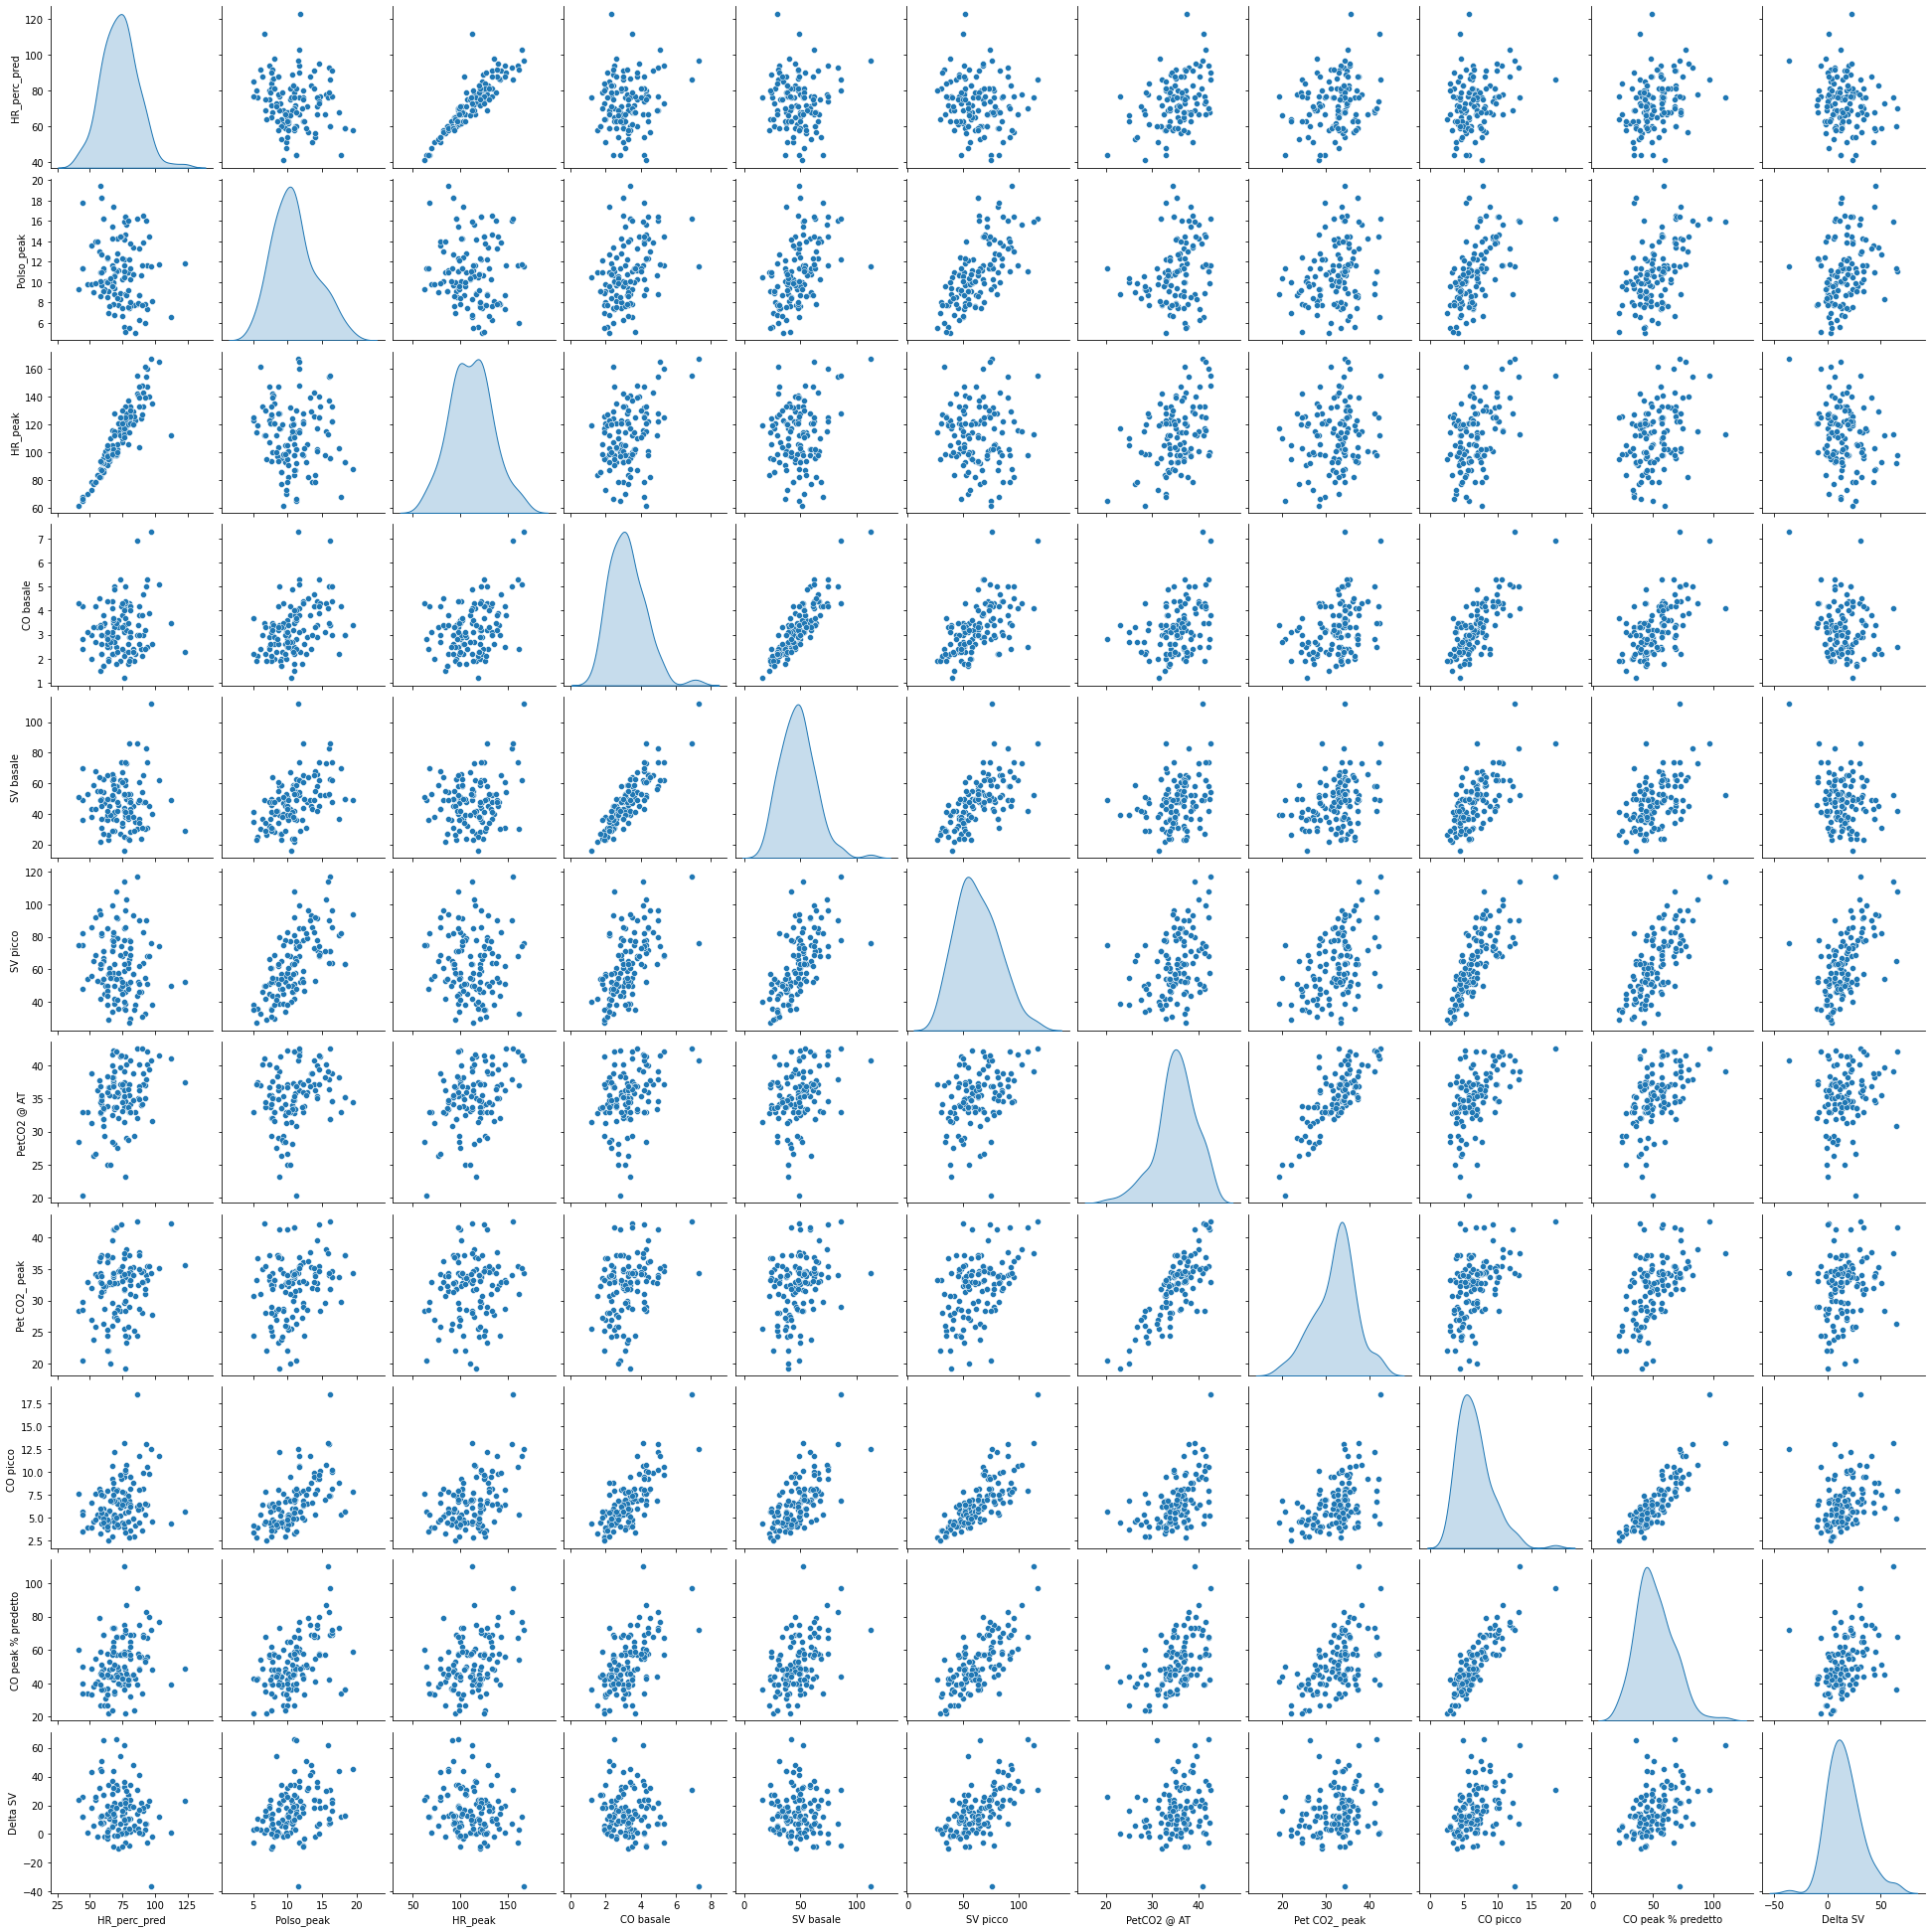

In [7]:
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras import layers

print(tf.__version__)

train_data = DataFrame.sample(frac=0.75, random_state=0)
test_data = DataFrame.drop(train_data.index)

#Joint Distribution of training data
sn.pairplot(train_data[['HR_perc_pred',
                        'Polso_peak',
                        'HR_peak',
                        'CO basale',
                        'SV basale',
                        'SV picco',
                        'PetCO2 @ AT',
                        'Pet CO2_ peak',
                        'CO picco ',
                        'CO peak % predetto',
                        'Delta SV']],diag_kind="kde")


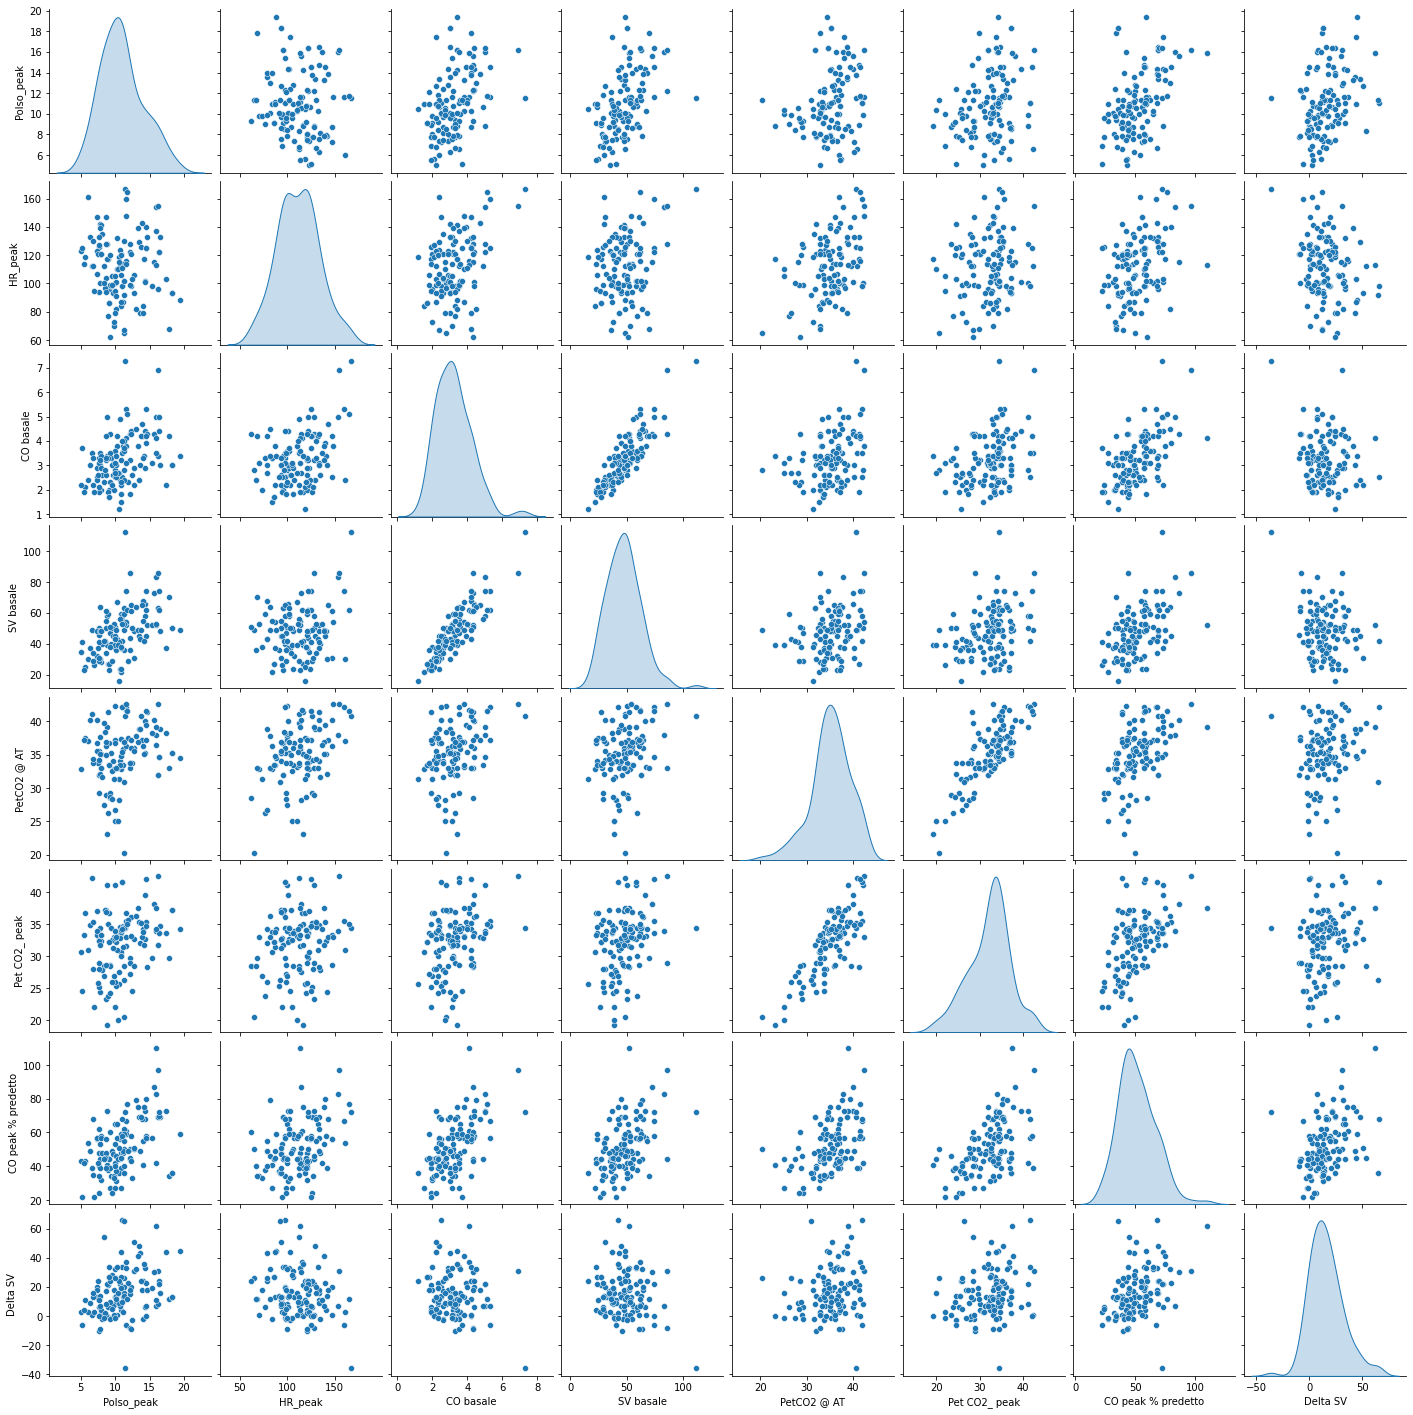

In [6]:
sn.pairplot(train_data[['Polso_peak',
                        'HR_peak',
                        'CO basale',
                        'SV basale',
                        'PetCO2 @ AT',
                        'Pet CO2_ peak',
                        'CO peak % predetto',
                        'Delta SV']],diag_kind="kde")


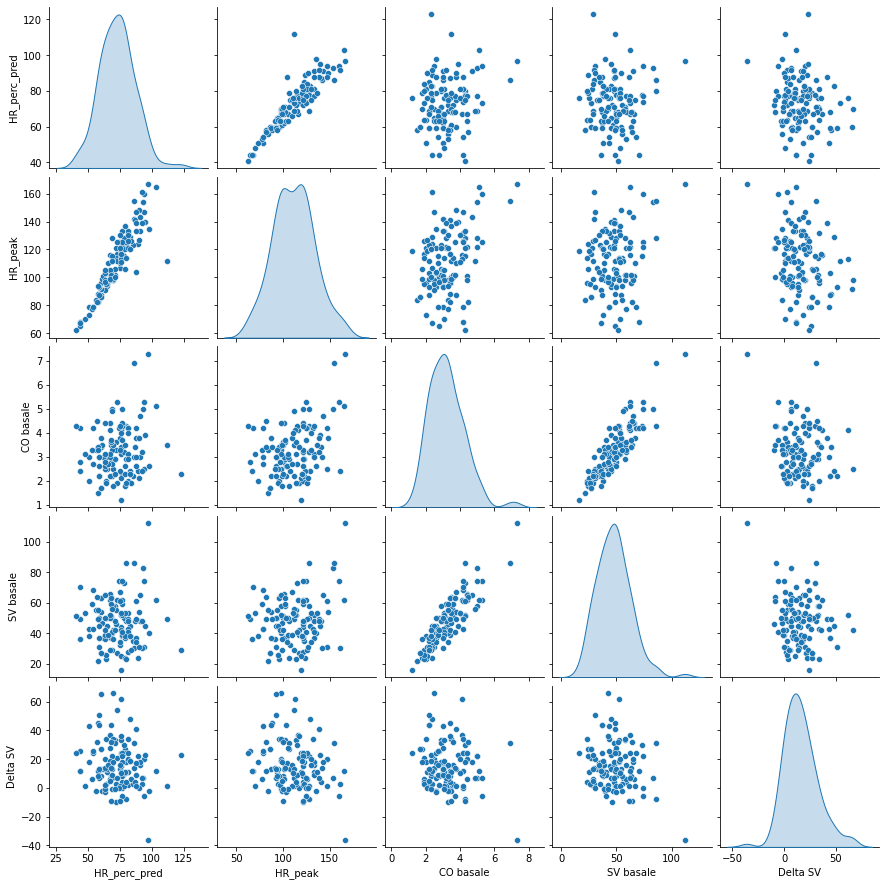

In [9]:
sn.pairplot(train_data[['HR_perc_pred',
                        'HR_peak',
                        'CO basale',
                        'SV basale',
                        'Delta SV']],diag_kind="kde")


In [13]:
train_stats = train_data.describe()
train_stats.pop('SV picco')
train_stats.transpose()
print(train_stats['CO basale'])

count    126.000000
mean       3.225397
std        1.023714
min        1.200000
25%        2.425000
50%        3.100000
75%        3.800000
max        7.300000
Name: CO basale, dtype: float64


In [14]:
train_stats['Pet CO2_ peak']

count    128.000000
mean      32.160938
std        4.762422
min       19.300000
25%       28.925000
50%       33.000000
75%       34.700000
max       42.500000
Name: Pet CO2_ peak, dtype: float64